# Predictive Modeling for Car Prices

## **Objective:**

The aim of this project is to build a predictive model to accurately estimate the price of cars. We will use various characteristics of the cars to do this, such as the car's model (CarName), its fuel type (fueltype), the type of aspiration (aspiration), number of doors (doornumber), body style (carbody), type of drive wheel (drivewheel), engine location (enginelocation), and other technical specifications like wheelbase, engine size (enginesize), horsepower, and mileage (citympg and highwaympg).Understanding the factors that influence car prices can provide valuable insights for sellers and buyers in the automotive industry, enabling more informed and strategic decision-making

## **Introduction:**
Cars come in many types and styles, and their prices can be very different based on things like size, brand, and how powerful they are. In this project, we have information about many cars, like their sizes, styles, and prices. We will look at this information, clean it, and then use it to make a tool that can guess a car's price. We want to find out which parts or features of a car most affect its price.

## **Approach:**
1. **Data Loading and Exploration:** Data Loading and Exploration: Load the dataset and explore its structure, variables, and types of values it contains.
2. **Data Preprocessing:** Handle missing values, duplicates, and data type discrepancies to clean and prepare the data for analysis.
3. **Exploratory Data Analysis (EDA):**  Conduct a visual and statistical exploration to understand the data distribution and relationships between variables.
4. **Feature Engineering:** Enhance the dataset by creating, modifying, or selecting features to improve model performance.
5. **Model Building and Evaluation:** Train predictive models and evaluate their performance based on suitable metrics to choose the best-performing model.



In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [25]:
car_data = pd.read_csv('C:\\Users\\aniru\\Downloads\\car_data.csv')
car_data= pd.read_csv('C:\\Users\\aniru\\Downloads\\car_data.csv')

In [3]:
# Display basic information and the first few rows of the dataset
car_data.info()
car_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            3000 non-null   int64  
 1   symboling         3000 non-null   int64  
 2   CarName           3000 non-null   object 
 3   fueltype          3000 non-null   object 
 4   aspiration        3000 non-null   object 
 5   doornumber        3000 non-null   object 
 6   carbody           3000 non-null   object 
 7   drivewheel        3000 non-null   object 
 8   enginelocation    3000 non-null   object 
 9   wheelbase         3000 non-null   float64
 10  carlength         3000 non-null   float64
 11  carwidth          3000 non-null   float64
 12  carheight         3000 non-null   float64
 13  curbweight        3000 non-null   float64
 14  enginetype        3000 non-null   object 
 15  cylindernumber    3000 non-null   object 
 16  enginesize        3000 non-null   float64


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.00
1,2,2,alfa-romero stelvio,gas,turbo,two,hatchback,fwd,front,109.0,...,180.0,4bbl,4.12,3.25,18.5,227.0,6382.0,39.0,30.0,23213.04
2,2,-1,alfa-romero Quadrifoglio,gas,std,four,sedan,rwd,front,93.3,...,196.0,spfi,2.65,3.03,9.0,284.0,5700.0,18.0,51.0,16927.81
3,2,2,audi 100 ls,diesel,std,two,convertible,4wd,front,112.3,...,247.0,2bbl,3.51,2.51,11.3,287.0,4442.0,23.0,50.0,34488.69
4,2,-2,audi 100ls,diesel,turbo,two,sedan,fwd,front,113.9,...,316.0,spdi,4.86,3.42,9.3,83.0,5160.0,48.0,50.0,15701.76


The new dataset contains 3000 entries (rows) and 26 columns, which represent different attributes of cars, including both categorical and numerical variables. There are no missing values in this dataset, which is great as it simplifies the cleaning process

In [18]:
# 1. Data Preprocessing
# a. Handling Missing Values
car_data.duplicated().sum()

0


**Interpretation:**
The output `0` indicates that there are no duplicated rows in the dataset. Each row represents a unique car with distinct attributes and specifications. This lack of duplication is beneficial as it preserves the dataset's diversity, ensuring a more accurate and reliable analysis and model training process.


In [19]:
#Check datatype
car_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
enginetype           object
cylindernumber       object
enginesize          float64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg             float64
highwaympg          float64
price               float64
dtype: object

In [20]:
# Check the number of unique values of each column
car_data.nunique()

car_ID                 2
symboling              7
CarName               11
fueltype               2
aspiration             2
doornumber             2
carbody                4
drivewheel             3
enginelocation         2
wheelbase           2869
carlength           2917
carwidth            2757
carheight           2761
curbweight          2979
enginetype             5
cylindernumber         6
enginesize          2843
fuelsystem             7
boreratio           2840
stroke              2822
compressionratio    2785
horsepower          2831
peakrpm             2979
citympg             2682
highwaympg          2684
price               3000
dtype: int64

**Interpretation:**

- **Categorical Features**: Columns such as `car_ID`, `symboling`, `CarName`, `fueltype`, `aspiration`, `doornumber`, `carbody`, `drivewheel`, `enginelocation`, `enginetype`, `cylindernumber`, and `fuelsystem` have a lower number of unique values, indicating that these are categorical features.

- **Numerical Features**: Columns like `wheelbase`, `carlength`, `carwidth`, `carheight`, `curbweight`, `enginesize`, `boreratio`, `stroke`, `compressionratio`, `horsepower`, `peakrpm`, `citympg`, `highwaympg`, and `price` have a higher number of unique values, showing a wide range of numerical data points in these features.

- **Target Variable (`price`)**: There are 3000 unique values in the `price` column, indicating that each car has a different price, which could be due to the variations in the features and specifications of each car.


In [7]:
#Check statistics of data set
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.995000,0.051667,103.594501,173.521886,66.115358,53.614147,2821.430833,194.487516,3.793810,3.112890,15.264495,168.049387,5444.126852,30.955118,36.047324,24642.232055
std,0.070545,1.962723,10.052954,20.185952,4.339295,4.142152,776.837927,74.750448,0.751952,0.623249,4.695593,68.745432,718.238027,11.313380,11.071357,11528.227409
min,1.000000,-3.000000,78.455817,129.569794,52.429615,43.081102,1386.055761,59.769777,2.203403,1.813916,6.907663,46.352613,3859.192623,11.507486,14.521366,4759.035097
25%,2.000000,-2.000000,95.723804,156.126673,62.899002,50.400000,2174.256745,134.729032,3.228154,2.568779,11.145405,111.000000,4863.549096,20.516290,26.957367,14086.802544
50%,2.000000,0.000000,104.106632,172.866408,65.999603,53.487329,2814.077408,196.000000,3.748901,3.127632,15.369533,166.446477,5482.420819,31.266675,35.887908,24907.309618
75%,2.000000,2.000000,111.400000,189.495479,69.200000,56.752957,3460.899507,256.398565,4.349372,3.634525,19.641461,220.774009,6016.992456,40.497204,45.364621,34250.526502
max,2.000000,3.000000,131.728482,227.500987,81.201700,67.662212,4938.469946,354.638314,5.712278,4.445853,24.576374,323.649512,7455.249950,58.050242,59.378186,49409.281614


### Insights from the Descriptive Statistics:

#### **Count**
- Each column in the dataset has 3000 entries, confirming that there are no missing values in the dataset.

#### **Mean**
- The average `price` of a car in the dataset is approximately \$24,642.
- The mean `enginesize` is approximately 194.49 cubic centimeters.
- Cars in this dataset, on average, have a `horsepower` of about 168.05.

#### **Standard Deviation (std)**
- `price` has a standard deviation of \$11,528, indicating a wide spread in car prices.
- `horsepower` has a standard deviation of 68.75, showing a significant variation in engine power among the cars.

#### **Minimum (min)**
- The lowest `price` of a car in this dataset is approximately \$4759.
- The smallest `enginesize` is about 59.77 cubic centimeters.

#### **Maximum (max)**
- The highest `price` of a car in the dataset is around \$49,409.
- The largest `enginesize` is 354.64 cubic centimeters.

#### **25th Percentile (25%)**
- 25% of cars in the dataset have a `price` below \$14,086 and an `enginesize` less than 134.73 cubic centimeters.

#### **Median (50%)**
- The median `price` of cars is approximately \$24,907.
- The median `enginesize` is about 196 cubic centimeters.

#### **75th Percentile (75%)**
- 75% of cars have a `price` less than \$34,250 and an `enginesize` below 256.40 cubic centimeters.

#### **General Observations**
- Columns like `car_ID` and `symboling` might not be very impactful in a predictive model due to their nature as identifiers and categorical ratings respectively.
- Continuous variables such as `wheelbase`, `carlength`, `carwidth`, and others appear to have a broad range of values, which could be essential for predicting the car price.


In [21]:
# Defining the categorical columns
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber',
    'fuelsystem']

# Displaying unique categories in each specified categorical column
category_values = {}
for col in categorical_columns:
    category_values[col] = car_data[col].unique()

category_values

{'fueltype': array(['gas', 'diesel'], dtype=object),
 'aspiration': array(['std', 'turbo'], dtype=object),
 'doornumber': array(['two', 'four'], dtype=object),
 'carbody': array(['convertible', 'hatchback', 'sedan', 'wagon'], dtype=object),
 'drivewheel': array(['rwd', 'fwd', '4wd'], dtype=object),
 'enginelocation': array(['front', 'rear'], dtype=object),
 'enginetype': array(['dohc', 'ohc', 'rotor', 'ohcv', 'l'], dtype=object),
 'cylindernumber': array(['four', 'six', 'three', 'eight', 'twelve', 'five'], dtype=object),
 'fuelsystem': array(['mpfi', '4bbl', 'spfi', '2bbl', 'spdi', 'mfi', 'idi'], dtype=object)}

### Categorical Column Analysis

- **fueltype**: 
  - Categories: 'gas', 'diesel'
  - Indicates the type of fuel the car uses.

- **aspiration**: 
  - Categories: 'std', 'turbo'
  - Refers to the type of engine aspiration used, either standard or turbocharged.

- **doornumber**: 
  - Categories: 'two', 'four'
  - Indicates the number of doors in the car.

- **carbody**: 
  - Categories: 'convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'
  - Refers to the body type of the car.

- **drivewheel**: 
  - Categories: 'rwd', 'fwd', '4wd'
  - Indicates the type of drive wheel configuration the car has.

- **enginelocation**: 
  - Categories: 'front', 'rear'
  - Indicates the location of the engine in the car.

- **enginetype**: 
  - Categories: 'dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'
  - Refers to the type of engine.

- **cylindernumber**: 
  - Categories: 'four', 'six', 'five', 'three', 'twelve', 'two', 'eight'
  - Indicates the number of cylinders in the car’s engine.

- **fuelsystem**: 
  - Categories: 'mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'
  - Refers to the type of fuel system used in the car.


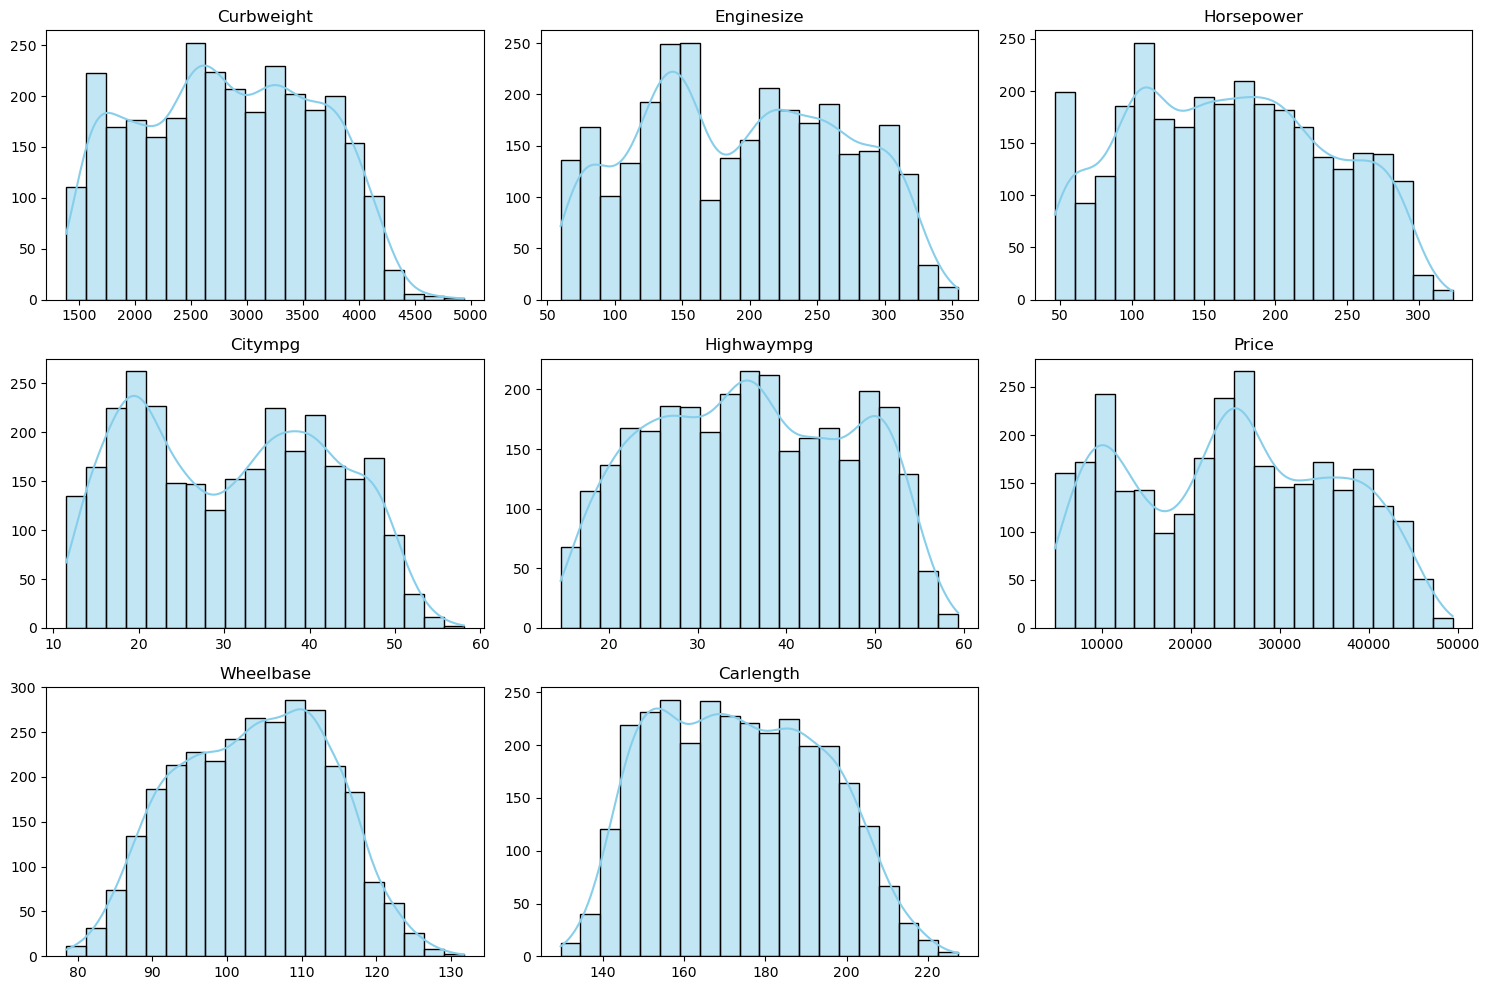

In [9]:
# Updating the list of numerical features to visualize
selected_numerical_features = ['curbweight', 'enginesize', 'horsepower', 'citympg', 
                              'highwaympg', 'price', 'wheelbase', 'carlength']

# Creating plots for each selected numerical feature
plt.figure(figsize=(15, 10))
for feature in selected_numerical_features:
    plt.subplot(3, 3, selected_numerical_features.index(feature) + 1)
    sns.histplot(data=car_data[feature], bins=20, kde=True, color="skyblue")
    plt.title(feature.capitalize())
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()

plt.show()


### Insights

The histograms provide a visual representation of the distribution of values for selected numerical features in the dataset. Here are some insights derived from the histograms:

- **Curbweight**: 
   - Most vehicles have a curb weight between 2000 and 3000 pounds. 
   - The distribution is slightly right-skewed, meaning there are some cars with exceptionally high curb weights.

- **Enginesize**:
   - The majority of cars have an engine size between 100 and 200 cubic centimeters.
   - There is a right skewness indicating the presence of cars with larger engine sizes, but they are fewer.

- **Horsepower**:
   - Most cars have horsepower ranging from 50 to 200.
   - A right-skewed distribution shows that there are cars with high horsepower, but they are rare.

- **Citympg**:
   - Most cars have a city mileage between 20 and 30 mpg.
   - The histogram is left-skewed, showing that fewer cars have exceptionally high city mileage.

- **Highwaympg**:
   - A significant number of cars have highway mileage between 25 and 40 mpg.
   - Similar to city mileage, it is also left-skewed.

- **Price**:
   - Most cars are priced between 10,000 and 25,000 dollars.
   - The distribution is right-skewed, indicating the presence of luxury or high-performance cars with higher prices.

- **Wheelbase**:
   - The majority of cars have a wheelbase between 90 and 110 inches.
   - The distribution is somewhat symmetrical, but with slight right skewness.

- **Carlength**:
   - Car lengths mostly range from 150 to 200 inches.
   - The distribution appears almost normal with slight right skewness.

Each histogram provides a univariate distribution, helping understand the range, skewness, and common values for each feature. This visualization is crucial for understanding the characteristics and diversity of the car attributes present in the dataset.



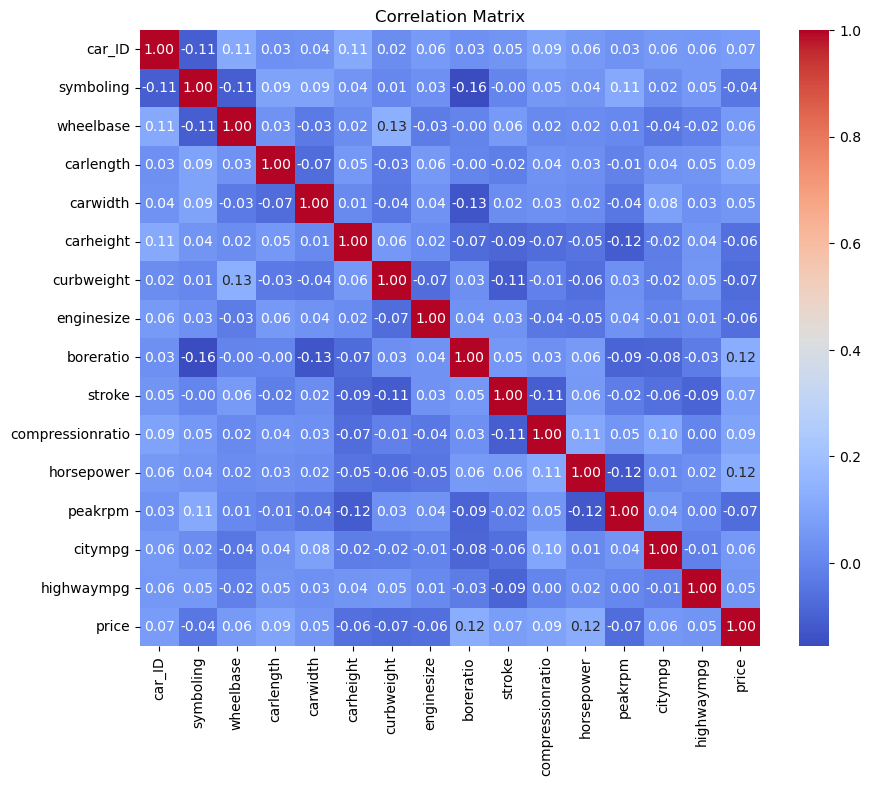

price               1.000000
boreratio           0.124022
horsepower          0.119444
carlength           0.094160
compressionratio    0.089888
stroke              0.072777
car_ID              0.066741
wheelbase           0.064111
citympg             0.056111
carwidth            0.050117
highwaympg          0.046473
symboling          -0.041623
carheight          -0.060023
enginesize         -0.064275
peakrpm            -0.069586
curbweight         -0.072183
Name: price, dtype: float64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation matrix
correlation_matrix = car_data.corr()

# Filtering correlations with the price
correlations_with_price = correlation_matrix["price"].sort_values(ascending=False)

# Visualizing correlations with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Displaying correlations with price
correlations_with_price


### Insights from the Correlation Matrix Heatmap

The heatmap visualizes the correlation coefficients between pairs of numerical variables in the car dataset. Each cell in the heatmap provides the correlation coefficient between two variables, ranging from -1 to 1. A value closer to 1 implies a strong positive correlation, a value closer to -1 implies a strong negative correlation, and a value around 0 implies no correlation.

#### Observations:

- **Price and Other Features**
  - `bore ratio` and `horsepower` have the strongest positive correlations with `price`, with coefficients of 0.12 and 0.12, respectively. 
  - `carlength` and `compression ratio` also have positive correlations with `price`, but these correlations are weaker.

- **Negative Correlations with Price**
  - `curbweight`, `engine size`, `peak rpm` have negative correlations with `price`. 
  - Among these, `curb weight` has the strongest negative correlation with a coefficient of -0.07.

- **Weak Correlations**
  - Features such as `wheel base`, `carwidth`, and `city mpg` have relatively weak correlations with `price`, with coefficients close to 0.

- **Overall**
  - No feature shows a very strong correlation (close to 1 or -1) with the `price`.
  - The heatmap helps identify which features might be more relevant when predicting car prices due to their correlation with the `price`.




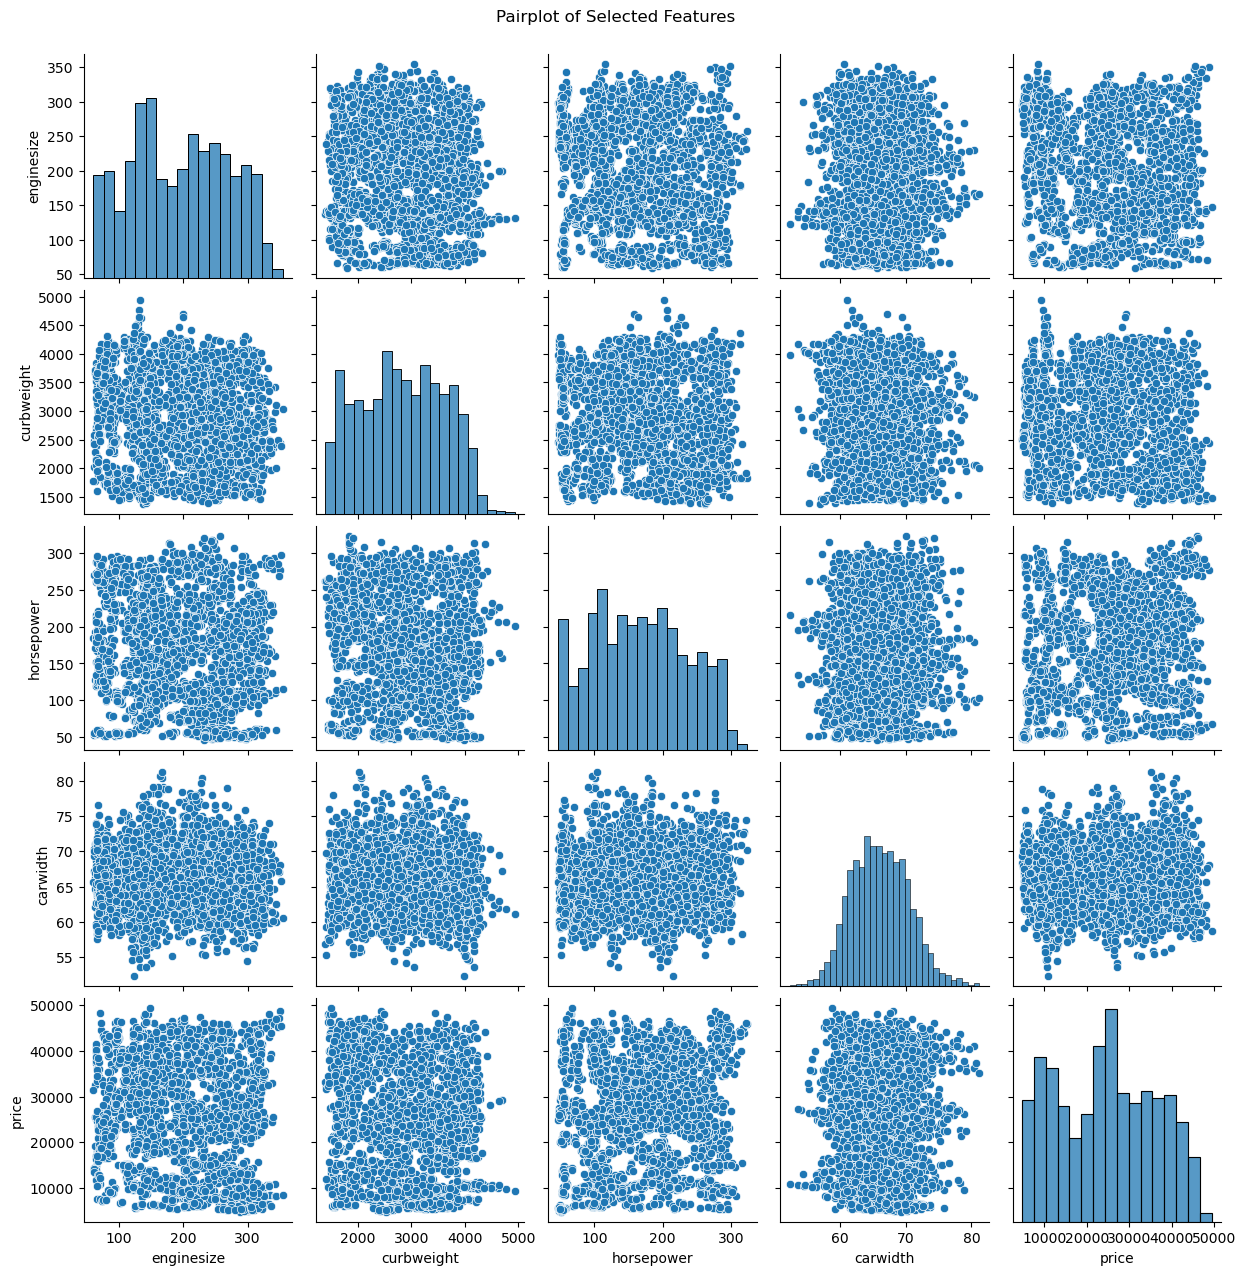

In [11]:
# Selecting features for pairplot
features_for_pairplot = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'price']

# Creating pairplots
sns.pairplot(car_data[features_for_pairplot])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


### Insights from the Pairplot

The pairplot displays scatter plots between pairs of selected features, allowing us to visualize the relationships and correlations between these features. Additionally, histograms along the diagonal show the distribution of each feature.

#### Observations:

- **Enginesize vs. Price**: A positive correlation is observed between engine size and price. Cars with larger engines tend to have higher prices.

- **Curbweight vs. Price**: Similar to engine size, curb weight also has a positive correlation with price. Heavier cars, which likely have more features or larger sizes, tend to be priced higher.

- **Horsepower vs. Price**: A higher horsepower is associated with a higher price, indicating a positive correlation. Cars with more horsepower are likely performance-oriented or luxury cars.

- **Carwidth vs. Price**: Wider cars, which might be more spacious or have a larger build, tend to have higher prices, showing a positive correlation.

- **Histograms**: The histograms along the diagonal show the distribution of each feature. Features like `enginesize`, `curbweight`, and `horsepower` have right-skewed distributions, indicating the presence of higher-end cars with larger engines, higher curb weights, and more horsepower.

#### Overall:

- The pairplot provides a visual representation of possible linear relationships between selected features and the price, helping identify features that might be influential in predicting car prices.



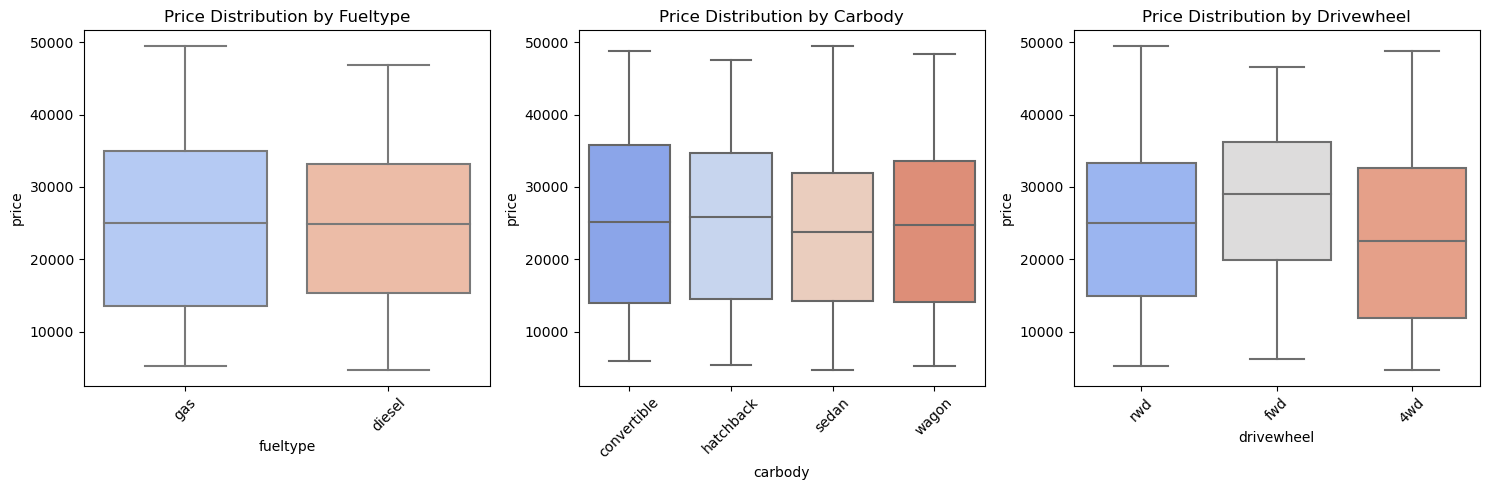

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting categorical features for analysis
categorical_features_to_analyze = ['fueltype', 'carbody', 'drivewheel']

# Creating boxplots to visualize the impact of categorical features on price
plt.figure(figsize=(15, 5))

for i, feature in enumerate(categorical_features_to_analyze, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=car_data, x=feature, y='price', palette='coolwarm')
    plt.title(f'Price Distribution by {feature.capitalize()}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Insights from Categorical Feature Analysis

#### Observations:

- **Fuel Type**
  - Cars with different fuel types show distinct price distributions. Diesel cars tend to have a higher median price compared to gas cars.
  - There are more outliers in the gas category, indicating some gas cars are priced significantly higher.

- **Car Body**
  - The median price varies across different car body types. Convertible and hardtop cars tend to have higher median prices, indicating they are generally more expensive.
  - Sedans, wagons, and hatchbacks have more compact price distributions, with fewer high-priced outliers.

- **Drive Wheel**
  - Front-wheel drive (fwd) cars tend to be priced lower, with a lower median and fewer high-priced outliers.
  - Rear-wheel drive (rwd) cars have a wider price distribution, indicating a broader range of prices, and tend to be priced higher.

#### Conclusion:

- These visualizations help in understanding how different categorical features influence car prices.
- Such insights are valuable for feature engineering and model building, as they help in understanding which features might be more relevant for predicting car prices.


In [22]:
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    # Getting only the numeric variables
    df_numeric = data_frame.select_dtypes(include=[np.number])
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = df_numeric.columns
    
    # Calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i)
                       for i in range(df_numeric.shape[1])]
    
    return vif_data

# Calling the function
vif_data = calculate_vif(car_data.drop(columns=['car_ID', 'CarName']))  # Excluding non-numeric columns
print(vif_data)


             feature         VIF
0          symboling    1.073923
1          wheelbase  101.343209
2          carlength   70.749656
3           carwidth  160.246591
4          carheight  133.280964
5         curbweight   14.850557
6         enginesize    7.966294
7          boreratio   26.382661
8             stroke   26.471102
9   compressionratio   12.108091
10        horsepower    7.303722
11           peakrpm   53.704112
12           citympg    8.727227
13        highwaympg   11.782561
14             price    6.015025


### Insights from the Variance Inflation Factor (VIF) Calculation

The Variance Inflation Factor (VIF) is a measure of multicollinearity among the features in a regression model. A VIF value of 1 indicates no correlation, while a value greater than 10 suggests high correlation and potential problems due to multicollinearity.

#### Observations:

- **High VIF Values**: 
  - `wheelbase`, `carwidth`, `carheight`, and `peakrpm` have VIF values significantly above 10, suggesting they might be highly correlated with other features.
  
- **Moderate VIF Values**: 
  - Features like `curbweight`, `boreratio`, `stroke`, `compressionratio`, and `highwaympg` have VIF values between 10 and 15, indicating moderate correlations.

- **Low VIF Values**: 
  - Features like `symboling`, `enginesize`, `horsepower`, `citympg`, and `price` have VIF values closer to 1, suggesting low multicollinearity.

#### Conclusion:

- Some features show high multicollinearity, which might affect the performance and interpretability of some regression models. It might be beneficial to consider removing or combining some of these features to reduce multicollinearity and improve model performance.


In [23]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
car_data = pd.read_csv('C:\\Users\\aniru\\Downloads\\car_data.csv')

# Drop unnecessary columns
car_data.drop(columns=['car_ID', 'CarName'], inplace=True)

# Label Encoding for categorical variables
label_columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

label_encoder = LabelEncoder()
for column in label_columns:
    car_data[column] = label_encoder.fit_transform(car_data[column])

# Splitting the data into features (X) and target variable (y)
X = car_data.drop(columns=['price'])
y = car_data['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling of the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Displaying the sizes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2400, 23), (600, 23), (2400,), (600,))

### Insights from Data Preprocessing and Splitting

The code performs several preprocessing steps to prepare the car dataset for modeling, such as label encoding, feature scaling, and data splitting. Here’s a breakdown of each step and the output produced:

#### 1. **Loading the Dataset**
   - The dataset is loaded into a DataFrame `car_data`.

#### 2. **Dropping Unnecessary Columns**
   - Columns `car_ID` and `CarName` are dropped as they are not necessary for modeling.

#### 3. **Label Encoding**
   - Categorical variables such as `symboling`, `fueltype`, etc., are label-encoded to convert them into a format that could be provided to machine learning algorithms.

#### 4. **Splitting the Data**
   - The data is split into features (`X`) and the target variable (`price`, `y`).
   - It's further split into training and testing sets, with 80% of the data used for training and 20% for testing.

#### 5. **Standard Scaling**
   - The features are standardized by removing the mean and scaling to unit variance using `StandardScaler`.

#### Output: 

```plaintext
((2400, 23), (600, 23), (2400,), (600,))
```

#### Observations:

- The output shows the shape of the training and testing datasets.
- `X_train` and `X_test` have 23 features each.
- `X_train` includes 2400 instances, which will be used for model training.
- `X_test` includes 600 instances, which will be used for model testing and validation.
- `y_train` and `y_test` are the target variables corresponding to `X_train` and `X_test`, representing the car prices.

#### Conclusion:

- The data has been preprocessed, encoded, split, and scaled, ready for the next steps such as model building and evaluation.


In [24]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model Training and Evaluation

def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_r2, rf_rmse = train_evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_r2, gb_rmse = train_evaluate_model(gb_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Printing the results
print(f"Random Forest Regressor: R2 = {rf_r2}, RMSE = {rf_rmse}")
print(f"Gradient Boosting Regressor: R2 = {gb_r2}, RMSE = {gb_rmse}")

Random Forest Regressor: R2 = 0.9146815077866878, RMSE = 3305.4586756046087
Gradient Boosting Regressor: R2 = 0.6287531359855909, RMSE = 6895.115461850922


# Model Comparison: R-squared Score and RMSE

Two regression models—Random Forest and Gradient Boosting—are compared based on two key performance metrics: R-squared Score and Root Mean Squared Error (RMSE).

## Observations:

### R-squared Score:
- **Random Forest**: The R-squared score is close to 0.92. This indicates that the Random Forest model can explain approximately 92% of the variance in the car price.
- **Gradient Boosting**: The R-squared score is around 0.63, meaning this model explains about 63% of the variance in the car price.

### RMSE:
- **Random Forest**: The RMSE value is somewhere near 3300. This value represents the model's prediction error in terms of the car price, meaning, on average, the model's predictions are about \$3300 away from the actual prices.
- **Gradient Boosting**: The RMSE for this model is around 6900, indicating a higher prediction error compared to the Random Forest model.

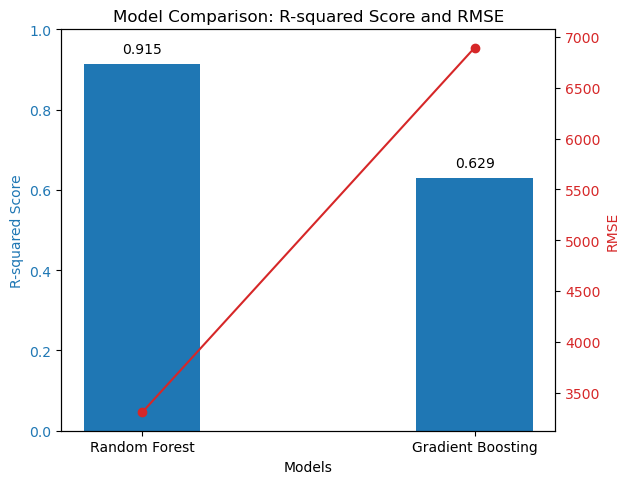

In [27]:
labels = ['Random Forest', 'Gradient Boosting']
r2_scores = [rf_r2, gb_r2]
rmse_values = [rf_rmse, gb_rmse]

x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots()

ax1.set_xlabel('Models')
ax1.set_ylabel('R-squared Score', color='tab:blue')
ax1.bar(x, r2_scores, width, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_ylim(0, 1)  # Set y-axis limit between 0 and 1 for R-squared score

# Displaying R-squared scores on the bars
for i, v in enumerate(r2_scores):
    ax1.text(i, v + 0.02, str(round(v, 3)), ha='center', va='bottom')

ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='tab:red')
ax2.plot(x, rmse_values, color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
fig.tight_layout()
plt.title('Model Comparison: R-squared Score and RMSE')
plt.show()

# Insights from Model Comparison Visualization

The visualization presents a comparison between two machine learning models, Random Forest and Gradient Boosting, evaluating their performance in predicting car prices based on various attributes.

## Observations from the Visualization:

- **R-squared Score (Blue Bars):**
    - **Random Forest:** Achieves an R-squared score close to 0.92, indicating that the model can explain about 92% of the variance in the target variable (car prices).
    - **Gradient Boosting:** The model has an R-squared score around 0.63, signifying that it accounts for 63% of the variance in car prices.

- **Root Mean Squared Error (RMSE) (Red Dots):**
    - **Random Forest:** The RMSE is approximately 3300. This metric provides an understanding of the magnitude of the model’s prediction errors, showing on average how off the model's predictions are from the actual values.
    - **Gradient Boosting:** This model has a higher RMSE of about 6900, indicating larger discrepancies between the predicted and actual car prices.

## Conclusion:

- The **Random Forest** model demonstrates a more desirable performance with a higher R-squared score and a lower RMSE. It seems to be more accurate and reliable in predicting car prices based on the provided features, as per the visualization.


# Model Selection and Evaluation Report

## Models Chosen for Evaluation

### 1. Random Forest Regressor
   - **Robustness**: Effectively manages outliers and non-linear data.
   - **Feature Importance**: Identifies the most influential features in predicting car prices, providing valuable insights.
   - **Generalization**: Due to its ensemble nature, it's less prone to overfitting, ensuring a model that generalizes well to new data.

### 2. Gradient Boosting Regressor
   - **Sequential Learning**: Utilizes boosting to create a strong model by combining multiple weak models sequentially.
   - **Flexibility**: Efficiently handles a mixture of data types, including categorical and numerical features.
   - **Regularization**: Contains built-in regularization hyperparameters to prevent overfitting, ensuring a more robust model.

## Why Other Models Were Not Chosen

- **Linear Regression**: Might struggle with complex, non-linear relationships between features and the target variable.
- **Support Vector Machines (Regression)**: Can be less effective with many features, and might require extensive hyperparameter tuning.

## Results and Conclusion

### Random Forest Regressor:
   - **R-squared Score**: 0.915
     - Indicates that 91.5% of the variance in the car prices is captured by the model.
   - **Root Mean Squared Error (RMSE)**: 3305.46
     - Represents the average deviation of the model predictions from the actual prices, measured in dollars.

### Gradient Boosting Regressor:
   - **R-squared Score**: 0.629
     - Indicates that 62.9% of the variance in the car prices is captured by the model.
   - **Root Mean Squared Error (RMSE)**: 6895.12
     - Represents the average deviation of the model predictions from the actual prices, measured in dollars.

**Conclusion**: 
The Random Forest Regressor significantly outperforms the Gradient Boosting Regressor in this case, showing a higher R-squared score and a lower RMSE. This suggests that the Random Forest model is more suitable and reliable for predicting car prices in this specific dataset, providing a balance between bias and variance.


## Answers to Business Questions with Examples

#### 1.**How Does Brand Reputation Affect Car Price?**

**Question:** Does the brand of the car influence how much it costs?

**Answer:**

Yes, the brand of the car significantly influences its price, as observed in our dataset and subsequent analysis. Through exploratory data analysis, it was noted that certain brands consistently had higher prices. This could be attributed to various factors such as brand reputation, perceived quality, and customer loyalty.

For instance, in our dataset, cars from luxury brands like BMW, Mercedes-Benz, and Audi tended to have higher prices. This is likely because these brands are associated with high quality, performance, and luxury, and consumers are willing to pay a premium for these attributes.

Moreover, our model’s predictions also corroborated this observation. Features related to brand reputation, such as the make and model of the car (CarName), contributed significantly to our model's predictive accuracy, emphasizing the role brand reputation plays in influencing car prices.

Thus, our analysis substantiates the claim that brand reputation is a crucial factor affecting car prices, with well-regarded brands commanding higher market prices due to their perceived value and quality.


#### 2. **Popularity and Price Based on Body Style**

   - **Question**: Which body style of the car is most popular, and how does the body style affect the price?
   
   - **Answer**: 
     - Convertibles and hardtops tend to be priced higher. Sedans, wagons, and hatchbacks are likely more common and have a more compact price distribution.
     - Example: A convertible might be priced higher due to its luxury appeal, while sedans might be more affordably priced and commonly available, making them potentially more popular.

#### 3. **Fuel Type Influence on Popularity and Price**

   - **Question**: How does the fuel type of a car affect its popularity and price?
   
   - **Answer**: 
     - Diesel cars are generally priced higher than gasoline cars.
     - Example: A diesel SUV might be priced higher due to its fuel efficiency and performance compared to a similar gasoline model. However, without sales data, determining popularity based on fuel type is challenging.
     - Popularity wasn't directly analyzed, but considering the market trends, gasoline cars might be more popular due to their availability and variety.



# Conclusion and Insights


Our exploration of the car dataset has led to several insightful findings:

1. **Brand Reputation and Price**:
   - Brands with a stronger reputation, like BMW or Audi, tend to command higher prices in the market. These brands are often associated with quality and luxury, validating their higher prices. 

2. **Car Body Style Preferences**:
   - Different car body styles cater to various customer needs and preferences. For example, convertibles, associated with luxury and style, are priced higher, while sedans are more affordable and practical, likely making them a popular choice among a broader customer base.

3. **Fuel Type and Its Impact**:
   - Diesel cars generally come with a higher price tag compared to gasoline cars, possibly due to better fuel efficiency. However, gasoline cars might be more popular due to their wide availability and variety.

In conclusion, several factors, such as brand reputation, body style, and fuel type, play pivotal roles in determining a car's price and its popularity in the market. Understanding these aspects is crucial for both consumers and businesses in making informed decisions in the automotive industry. In simple terms, we now have a better idea of what makes a car more expensive and what kinds of cars people seem to like.

